# Project 2 : Analysis of Mobile Phone Cost

**Start Date: 3/31/2022, Due Date: 4/18/2022, By the midnight 11:59 EST**

NOTE: There are always last minute issues submitting the projects. DO NOT WAIT UNTIL THE LAST MINUTE!

<img src="image.jpeg" width="500" height="200" align="left"/>

**Individual Assignment:** Please EDIT this cell and add your name
    
    Aidan Horn


**Desired outcome of the project.**
* In this project we will look at mobile phone cost from the dataset data.csv.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!

**Data Description.**

The dataset data.csv is available from our project website: https://github.com/ds3010s22/ds3010_projects, and 
is originally from Kaggle: https://www.kaggle.com/code/dansbecker/classification/data?select=train.csv

The data contains 20 features including 
* battery_power: total energy a battery can store in one time measured in mAh
* blue: has bluetooth or not 
* clock_speed: speed at which microprocessor executes instructions 
* dual_sim: has dual sim support or not
* four_g: has 4G or not
* etc.

The target is the price range, which has 4 classes including 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost).

**Required Readings:** 
* This project will be based upon the scikit-learn Python library
* Read about deep learning at https://scikit-learn.org/stable/modules/neural_networks_supervised.html
* Read about Scikit-learn packages (LinearSVC and Logistic regression): 
    * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    * https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Pandas (https://pandas.pydata.org/)
* Numpy (www.numpy.org)
* Matplotlib (matplotlib.org)
* Scikit-learn (scikit-learn.org).

**NOTE**
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

# Read the data.

* Read the dataset with pandas and split it into train set (80%) and test set (20%)
* get the x_train, y_train (the features and the target for train set)
* get the x_test, y_test (the features and the target for test set)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv('data.csv')
data['price_range'] += 1

for col in data.columns:
    if len(pd.unique(data[col])) == 2:
        data[col] = data[col].astype('bool')

y = data['price_range']
X = data.drop('price_range', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null bool
clock_speed      2000 non-null float64
dual_sim         2000 non-null bool
fc               2000 non-null int64
four_g           2000 non-null bool
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null bool
touch_screen     2000 non-null bool
wifi             2000 non-null bool
price_range      2000 non-null int64
dtypes: bool(6), float64(2), int64(13)
memory usage: 246.2 KB


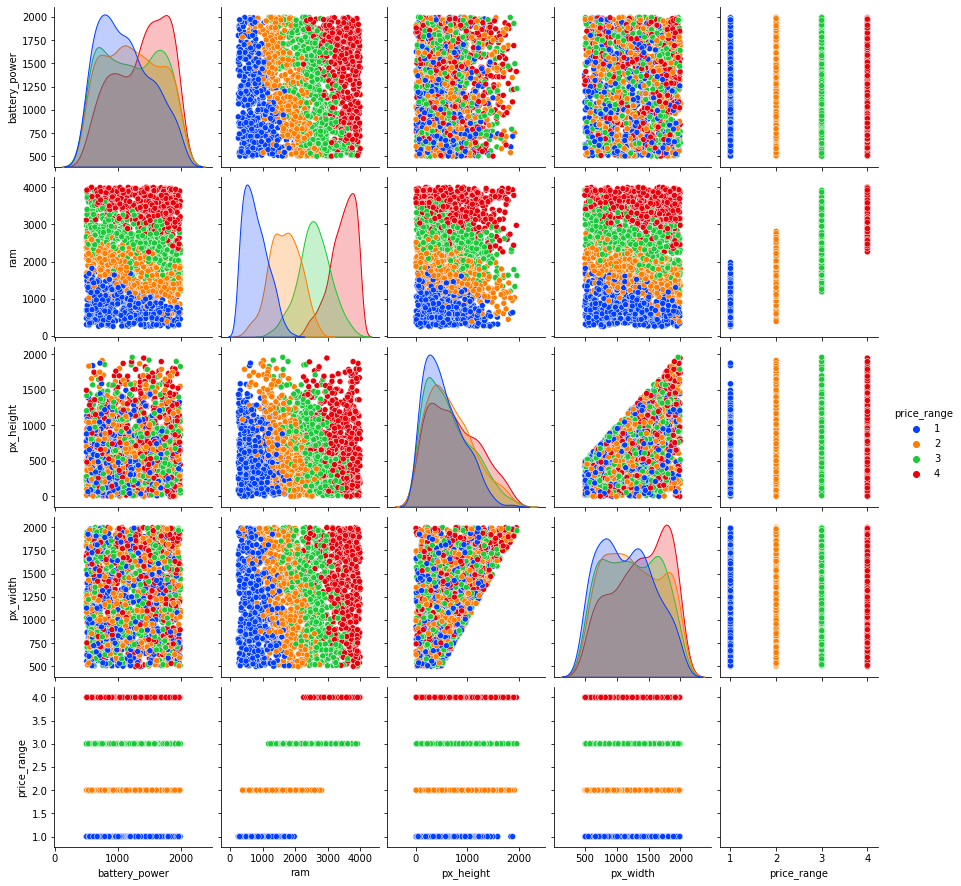

In [20]:
sns.pairplot(data, x_vars = ['battery_power','ram','px_height','px_width', 'price_range'], y_vars = ['battery_power','ram','px_height','px_width', 'price_range'], hue='price_range',palette="bright")

## Problem 1 (20 points): Machine learning algorithms


* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * Logistic regression
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

In [5]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#we will use the standard scaler to z-transform the features to standardize the distances in the data.

clf =  make_pipeline(StandardScaler(),
                     LinearSVC(random_state=0,max_iter = 10000, tol=1e-5))
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print(clf.score(x_test,y_test))

cf = pd.crosstab(y_pred, y_test, colnames = ['Actual'], rownames = ['Predicted'])

print(cf)

print()

print(classification_report(y_test, y_pred))

0.855
Actual      1   2   3    4
Predicted                 
1          95   4   0    0
2           0  61  21    0
3           0  27  73    1
4           0   0   5  113

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        95
           2       0.74      0.66      0.70        92
           3       0.72      0.74      0.73        99
           4       0.96      0.99      0.97       114

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [6]:
from sklearn.linear_model import LogisticRegression

clf =  make_pipeline(StandardScaler(),
                     LogisticRegression(random_state=0, solver = 'saga', 
                                       max_iter = 10000, multi_class = "multinomial"))
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(clf.score(x_test,y_test))

cf = pd.crosstab(y_pred, y_test, colnames = ['Actual'], rownames = ['Predicted'])

print(cf)

print()

print(classification_report(y_test, y_pred))

0.955
Actual      1   2   3    4
Predicted                 
1          93   2   0    0
2           2  85   3    0
3           0   5  91    1
4           0   0   5  113

              precision    recall  f1-score   support

           1       0.98      0.98      0.98        95
           2       0.94      0.92      0.93        92
           3       0.94      0.92      0.93        99
           4       0.96      0.99      0.97       114

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [12]:
import plotly.express as px
import numpy as np
from sklearn.decomposition import PCA

pca = PCA()
components = pca.fit_transform(x_test)
cumsum_var = pca.explained_variance_ratio_.cumsum() * 100

colors = [y_t if y_p == y_t else (y_p) * -1 for y_p,y_t in zip(y_pred,y_test)]

fig = px.scatter_3d(
    components, x=0, y=1, z=x_test.index, color=colors, size=0.1*np.ones(len(x_test)), opacity = 1,
    title=f'Sum of Explained Variance of PC1 and PC2: {cumsum_var[1]:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', 'z': 'index'},
    width=800, height=500
)
fig.show()

Using the PCA scores, we can determine which features are the most important so we can better analyze why certain points may have been missclassified.

In [5]:
#pd.DataFrame(pca.components_, columns = list(x_train.columns))

pc1_f = x_train.columns[np.argmax(abs(pca.components_[0]))]
pc2_f_s = pca.components_[0][np.argmax(abs(pca.components_[0]))]

print(f"The largest factor score for PC1 is {pc1_f} with a score of {pc2_f_s}")

pc2_f = x_train.columns[np.argmax(abs(pca.components_[1]))]
pc2_f_s = pca.components_[1][np.argmax(abs(pca.components_[1]))]

print(f"The largest factor score for PC2 is {pc2_f} with a score of {pc2_f_s}")

The largest factor score for PC1 is ram with a score of -0.9998093578006496
The largest factor score for PC2 is px_height with a score of 0.7257183548248759


In [13]:
sum_scores = np.dot(pca.explained_variance_ratio_, abs(pca.components_))

print("Factors in order of importance")
for i in np.argsort(-sum_scores):
    col = x_train.columns[i]
    print(f"Factor: {col} | Sum of Weighted Score: {round(sum_scores[i],2)} | Type: {x_train[col].dtype}")

Factors in order of importance
Factor: ram | Sum of Weighted Score: 0.69 | Type: int64
Factor: px_width | Sum of Weighted Score: 0.16 | Type: int64
Factor: px_height | Sum of Weighted Score: 0.15 | Type: int64
Factor: battery_power | Sum of Weighted Score: 0.11 | Type: int64
Factor: mobile_wt | Sum of Weighted Score: 0.0 | Type: int64
Factor: int_memory | Sum of Weighted Score: 0.0 | Type: int64
Factor: talk_time | Sum of Weighted Score: 0.0 | Type: int64
Factor: pc | Sum of Weighted Score: 0.0 | Type: int64
Factor: sc_h | Sum of Weighted Score: 0.0 | Type: int64
Factor: sc_w | Sum of Weighted Score: 0.0 | Type: int64
Factor: fc | Sum of Weighted Score: 0.0 | Type: int64
Factor: n_cores | Sum of Weighted Score: 0.0 | Type: int64
Factor: wifi | Sum of Weighted Score: 0.0 | Type: bool
Factor: touch_screen | Sum of Weighted Score: 0.0 | Type: bool
Factor: three_g | Sum of Weighted Score: 0.0 | Type: bool
Factor: clock_speed | Sum of Weighted Score: 0.0 | Type: float64
Factor: dual_sim | S

The most important factors are ram, px_width, px_height, and better_power. We will use these values as benchmarks to identify why certain points may have been missclassified.
Clearly most of the important factors are not binary categorical variables

We will select two points that have been misclassified by logstic regression, index 1341 which should have been classified as a 2 but was missclassified as 3, and index 935 which should have been classified as 4 but was missclassified as 3. Examing the graph of PC1 and PC2, we see that these points are on the edges of their respective zones. 

In [7]:
indexes = [1341, 935]

locater = ["Misclassified" if i in indexes else "Normal" for i in x_test.index]

Even though we know most of the factors are not important, we will go ahead and visualize the distributions of the features with respect to the price range. For non-categorical data, we will plot the missclassified values alongside.

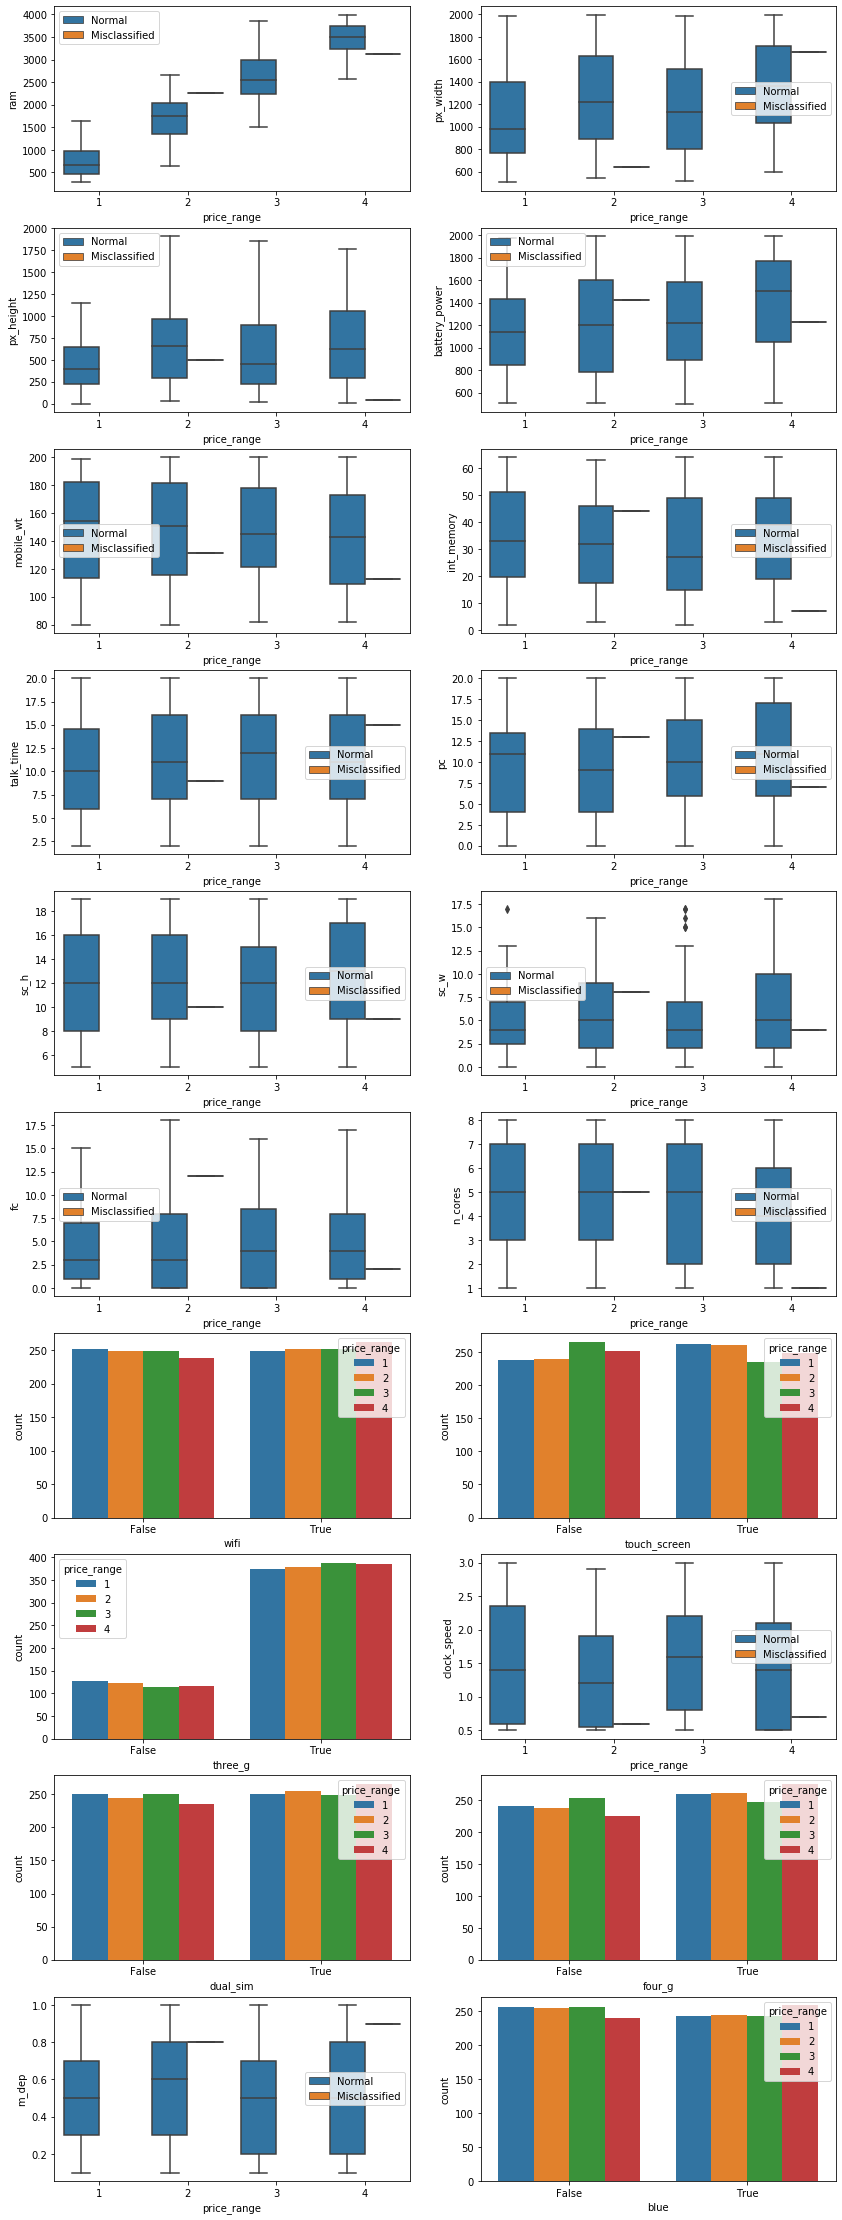

In [8]:
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(14, 40))

for i,ax in zip(np.argsort(-sum_scores), axs.reshape(-1)):
    
    col = x_train.columns[i]
    
    if x_test[col].dtype != 'bool': 
        sns.boxplot(y = x_test[col], x = y_test, hue = locater, ax = ax)
    else:
        sns.countplot(x = col, hue = "price_range", data = data, ax = ax)

Examining the data, it is difficult to conjecture why the datapoint were misclassified, but we have some clues. For point 965 (pred = 3, actual = 4), we can see that its battery_power is much closer to the mean of class 3 (high) than it is to the mean of class 4 (very high). For point 1341 (pred = 3, actual = 2), the ram is much higher than average for a phone of class 2 (medium) and more in line with a phone from class 3 (high)

## Problem 2 (20 points): Use a Multi-Layer Perceptron (MLP) for classifying the costs.  Explore the parameters for the MLP and compare the accuracies against your algorithms in Problem 1.

**Read the documentation for the MLPClassifier class at https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.** 
* Note: This is *very similar* to using the LinearSVC and Logistic regression classes above!
* Try different values for "hidden_layer_sizes".  What do you observe in terms of accuracy?
* Try different values for "activation". What do you observe in terms of accuracy?


In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score 

In [15]:
%%capture cap --no-stderr

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score 

#f = plt.figure()
#f.set_figwidth(60)
#f.set_figheight(40)

mlp_performance = pd.DataFrame(columns = ["Hidden Layer Size", 
                                          "Activation", 
                                          "Solver", 
                                          "Precision", 
                                          "Recall",
                                          "F1-Score",
                                          "Time to Fit",
                                          "Time to Predict"])

for hls in [(1,),(4,),(8,),(16,),(24,),(2,1,),(4,1,),(8,1,),(4,4,),(8,8,),(8,4,4,),(16,8,4,)]:
    for activation in ['identity','logistic','tanh','relu']:
        for solver in ['lbfgs', 'sgd', 'adam']:
        
            clf = make_pipeline(StandardScaler(), MLPClassifier(random_state=1, 
                                                        hidden_layer_sizes = hls,
                                                        activation = activation,
                                                        solver = solver,
                                                        max_iter=10000))

            time_to_fit = %timeit -n1 -r1 -o clf.fit(x_train, y_train)
            
            time_to_predict = %timeit -n1 -r1 -o clf.predict(x_test)
            y_pred = clf.predict(x_test)
            
           
            mlp_performance.loc[len(mlp_performance.index)] = [hls,
                                                              activation,
                                                              solver,
                                                              precision_score(y_test, y_pred, average = 'macro'),
                                                              recall_score(y_test, y_pred, average = 'macro'),
                                                              f1_score(y_test, y_pred, average = 'macro'),
                                                              time_to_fit.best,
                                                              time_to_predict.best] 

            #plt.plot(clf[1].loss_curve_, label = f"{hls} {activation} Score: {clf.score(x_test,y_test)}")

            #plt.legend(prop={'size': 30})
        
#plt.show()

#print(clf.score(x_test,y_test))

#cf = pd.crosstab(y_pred, y_test, colnames = ['Actual'], rownames = ['Predicted'])

#print(cf)

#print()

#print(classification_report(y_test, y_pred))

C:\Users\horna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\horna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\horna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\horna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\horna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\horna\Anaconda3\lib\site-packages\s

In [43]:
mlp_performance.sort_values(by = ['F1-Score'], ascending = False).tail(10)

,Hidden Layer Size,Activation,Solver,Precision,Recall,F1-Score,Time to Fit,Time to Predict
141,"(16, 8, 4)",relu,lbfgs,0.666147,0.714972,0.634618,1.119301,0.001510
95,"(8, 1)",relu,adam,0.570014,0.659591,0.596495,3.509657,0.001331
89,"(8, 1)",logistic,adam,0.748162,0.638065,0.589775,2.102001,0.001198
112,"(8, 8)",logistic,sgd,0.196025,0.272826,0.163556,0.089871,0.001247
100,"(4, 4)",logistic,sgd,0.083589,0.213730,0.116731,0.139380,0.001125
76,"(4, 1)",logistic,sgd,0.184673,0.252193,0.100659,0.161681,0.001507
64,"(2, 1)",logistic,sgd,0.061875,0.250000,0.099198,0.194501,0.001822
136,"(16, 8, 4)",logistic,sgd,0.059375,0.250000,0.095960,0.219442,0.001330
88,"(8, 1)",logistic,sgd,0.057500,0.250000,0.093496,0.146086,0.001187
124,"(8, 4, 4)",logistic,sgd,0.057500,0.250000,0.093496,0.161844,0.001283


Generally, models with more layers tend to perform better. The default activation for MLPClassification in Sklearn, Relu tends to perform well, though tanh with an sgd solver was the best performer. Let's see if we can improve the results with a much larger MLP using tanh activation and an sgd solver.

In [35]:
clf = make_pipeline(StandardScaler(), MLPClassifier(random_state=1, 
                                                        hidden_layer_sizes = (512,64,16),
                                                        activation = 'tanh',
                                                        solver = 'sgd',
                                                        max_iter=10000))

clf.fit(x_train, y_train)

print(clf.score(x_test,y_test))

y_pred = clf.predict(x_test)

cf = pd.crosstab(y_pred, y_test, colnames = ['Actual'], rownames = ['Predicted'])

print(cf)

print()

print(classification_report(y_test, y_pred))

0.9675
Actual      0   1   2   3
Predicted                
0          98   2   0   0
1           2  97   4   0
2           0   1  95   3
3           0   0   1  97

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       100
           1       0.94      0.97      0.96       100
           2       0.96      0.95      0.95       100
           3       0.99      0.97      0.98       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [18]:
clf = make_pipeline(StandardScaler(), MLPClassifier(random_state=1, 
                                                        hidden_layer_sizes = (1,),
                                                        activation = 'tanh',
                                                        solver = 'lbfgs',
                                                        max_iter=10000))
clf.fit(x_train, y_train)

print(clf.score(x_test,y_test))

y_pred = clf.predict(x_test)

cf = pd.crosstab(y_pred, y_test, colnames = ['Actual'], rownames = ['Predicted'])

print(cf)

print()

print(classification_report(y_test, y_pred))

0.98
Actual      1   2   3    4
Predicted                 
1          95   1   0    0
2           0  89   1    0
3           0   2  97    3
4           0   0   1  111

              precision    recall  f1-score   support

           1       0.99      1.00      0.99        95
           2       0.99      0.97      0.98        92
           3       0.95      0.98      0.97        99
           4       0.99      0.97      0.98       114

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



Even with the added complexity, a dense layer architecture does not perform better than a single hidden layer with a single neuron, nor better than the logistic regression model from earlier. This indicates that the true decision boundaries for our data are linearly seperable and that the more complex models are overfitting the data. We can gain additional confidence in this conclusion by testing various models against additional train test subsets for the data using stratified k-fold cross validation.

In [32]:
from sklearn.model_selection import StratifiedKFold

data = pd.read_csv('data.csv')

y = data['price_range']
X = data.drop('price_range', axis=1)

k = 5

skf = StratifiedKFold(n_splits=k)

scores = {'lsvc' : 0, 'lr' : 0, 'mlp_(1,)' : 0, 'mlp_(16,)' : 0, 'mlp_(16,4,)' : 0, 'mlp_(4,4,4,)' : 0}

for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.loc[train_index, :], X.loc[test_index, :]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    lsvc = make_pipeline(StandardScaler(), 
                    LinearSVC(random_state=0,
                              max_iter = 10000, tol=1e-5))
    lsvc.fit(x_train,y_train)
    
    #print(f"LSVC Score: {lsvc.score(x_test,y_test)}")
    
    scores['lsvc'] = scores.get('lsvc') + lsvc.score(x_test,y_test)
    
    lr = make_pipeline(StandardScaler(),
                    LogisticRegression(random_state=0, solver = 'saga', 
                                       max_iter = 10000, multi_class = "multinomial"))
    lr.fit(x_train,y_train)
    
    #print(f"LR Score: {lr.score(x_test,y_test)}")
    
    scores['lr'] = scores.get('lr') + lr.score(x_test,y_test)
    
    mlp_1 = make_pipeline(StandardScaler(), MLPClassifier(random_state=1, 
                                                        hidden_layer_sizes = (1,),
                                                        activation = 'tanh',
                                                        solver = 'lbfgs',
                                                        max_iter=10000))
    mlp_1.fit(x_train,y_train)
    
    #print(f"mlp_(1,) Score: {mlp_1.score(x_test,y_test)}")
    
    scores['mlp_(1,)'] = scores.get('mlp_(1,)') + mlp_1.score(x_test,y_test)
    
    mlp_16 = make_pipeline(StandardScaler(), MLPClassifier(random_state=1, 
                                                        hidden_layer_sizes = (16,),
                                                        activation = 'tanh',
                                                        solver = 'lbfgs',
                                                        max_iter=10000))
    mlp_16.fit(x_train,y_train)
    
    #print(f"mlp_(16,) Score: {mlp_16.score(x_test,y_test)}")
    
    scores['mlp_(16,)'] = scores.get('mlp_(16,)') + mlp_16.score(x_test,y_test)
    
    mlp_16_4 = make_pipeline(StandardScaler(), MLPClassifier(random_state=1, 
                                                        hidden_layer_sizes = (16,4,),
                                                        activation = 'tanh',
                                                        solver = 'lbfgs',
                                                        max_iter=10000))
    mlp_16_4.fit(x_train,y_train)
    
    #print(f"mlp_(16,4,) Score: {mlp_16_4.score(x_test,y_test)}")
    
    scores['mlp_(16,4,)'] = scores.get('mlp_(16,4,)') + mlp_16_4.score(x_test,y_test)
    
    mlp_4_4_4 = make_pipeline(StandardScaler(), MLPClassifier(random_state=1, 
                                                        hidden_layer_sizes = (4,4,4,),
                                                        activation = 'tanh',
                                                        solver = 'lbfgs',
                                                        max_iter=10000))
    mlp_4_4_4.fit(x_train,y_train)
    
    #print(f"mlp_(4,4,4,) Score: {mlp_4_4_4.score(x_test,y_test)}")
    
    scores['mlp_(4,4,4,)'] = scores.get('mlp_(4,4,4,)') + mlp_4_4_4.score(x_test,y_test)   
    
for m,s in zip(scores.keys(),scores.values()):
    print(f"{m} Average Score: {s/k}")

lsvc Average Score: 0.8549999999999999
lr Average Score: 0.9625
mlp_(1,) Average Score: 0.9780000000000001
mlp_(16,) Average Score: 0.9460000000000001
mlp_(16,4,) Average Score: 0.9075000000000001
mlp_(4,4,4,) Average Score: 0.96


These results indicate that our assumption holds. However, since the model tended to improve as additional layers were added, we can conclude that given a deep enough network, we could outperform our simple model.

## Problem 3 (20 points): Running time also matters!  How fast are the algorithms versus their accuracy?
**Compare the runtime of the algorithms in Problem 1 to the running time of the MLPClassifier** 

**The jupyter command %timeit can be used to measure how long a calculation takes https://ipython.readthedocs.io/en/stable/interactive/magics.html.**
* Try different values for "hidden_layer_sizes".  What do you observe in terms of runtime?
* Try different values for "activation". What do you observe in terms of runtime?
* How long does the "fit" function take as opposed to the "predict" function?  Can you explain why?

    LinearSVC

In [38]:
clf = make_pipeline(StandardScaler(), 
                    LinearSVC(random_state=0,
                              max_iter = 10000, tol=1e-5))
%timeit clf.fit(x_train,y_train)

%timeit clf.predict(x_test)

342 ms ± 11.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
634 µs ± 22.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


    Logistic Regression

In [44]:
clf = make_pipeline(StandardScaler(),
                    LogisticRegression(random_state=0, solver = 'saga', 
                                       max_iter = 10000, multi_class = "multinomial"))
%timeit clf.fit(x_train, y_train)

%timeit clf.predict(x_test)

46.8 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
669 µs ± 46.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


    MLP Layers = (1,), activation = "tanh", solver = "lbfgs"

In [45]:
clf = make_pipeline(StandardScaler(), MLPClassifier(random_state=1, 
                                                        hidden_layer_sizes = (1,),
                                                        activation = 'tanh',
                                                        solver = 'lbfgs',
                                                        max_iter=10000))

%timeit clf.fit(x_train, y_train)

%timeit clf.predict(x_test)

219 ms ± 5.67 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
717 µs ± 8.41 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


    MLP Layers = (512,64,16), activation = "tanh", solver = "sgd"

In [46]:
clf = make_pipeline(StandardScaler(), MLPClassifier(random_state=1, 
                                                        hidden_layer_sizes = (512,64,16),
                                                        activation = 'tanh',
                                                        solver = 'sgd',
                                                        max_iter=10000))

%timeit clf.fit(x_train, y_train)

%timeit clf.predict(x_test)

38.4 s ± 956 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.65 ms ± 351 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Linear SVC seems to take nearly 10 times as long to fit the model as logistic regression. For a dense MLP, we see that the time to compute increases exponentionally as the number of layers and nodes increases.

In [59]:
mlp_performance.sort_values(by = ['F1-Score'], ascending = True).head(10)

,Hidden Layer Size,Activation,Solver,Precision,Recall,F1-Score,Time to Fit,Time to Predict
88,"(8, 1)",logistic,sgd,0.057500,0.250000,0.093496,0.146086,0.001187
124,"(8, 4, 4)",logistic,sgd,0.057500,0.250000,0.093496,0.161844,0.001283
136,"(16, 8, 4)",logistic,sgd,0.059375,0.250000,0.095960,0.219442,0.001330
64,"(2, 1)",logistic,sgd,0.061875,0.250000,0.099198,0.194501,0.001822
76,"(4, 1)",logistic,sgd,0.184673,0.252193,0.100659,0.161681,0.001507
100,"(4, 4)",logistic,sgd,0.083589,0.213730,0.116731,0.139380,0.001125
112,"(8, 8)",logistic,sgd,0.196025,0.272826,0.163556,0.089871,0.001247
89,"(8, 1)",logistic,adam,0.748162,0.638065,0.589775,2.102001,0.001198
95,"(8, 1)",relu,adam,0.570014,0.659591,0.596495,3.509657,0.001331
141,"(16, 8, 4)",relu,lbfgs,0.666147,0.714972,0.634618,1.119301,0.001510


Models like linear SVC and Logistic regression do not use backpropagation, so there is only the minimization of the cost function which will depend on the learning rate of the function. With the addition of back propagation in addition to gradient descent for NLP, the fit rate will take longer.

By examining some of these examples, more complex layer architectures take a longer time to fit. This is to be expected, however, certain activation and solvers are faster. For example, relu activation is generally faster when compared to other activations. The pairing of relu activation and adam solver produced some of the fastest time to fit for deeper layers.

Finally, for most of the functions, the predictions are computed using matrix multiplication of the weights with stopgaps for the activation functions. The time to predict is negligible for smaller functions but also grows as the complexity of the layer architecture grows. Prediction will always be faster than fitting since prediction consists of one of the steps that is already involved in fiting the model.


## Problem 4 (20 points): Business question

* Suppose you had a machine learning algorithm that could estimate the mobile phone costs. What kind of business could you build around that?
* Who would be your customers?
* In addition, assume that your machine learning was slow to train, but fast in making predictions on new data. How would that affect your business plan?


### Business Case:

   * Suppose you are a vendor of second hand mobile phones, you buy and sell used phones. You may have a dataset of phone prices for a number of models, but you might receive a phone from a customer that you don't have an estimate for. With a pretrained regression model or neural network, you could input information you can discern about the phone and receive an estimated value for the phone.
   * This model would need to be updated when new phones are released. Since the number of new phones released over the course of a few months will be relatively low, the number of retrainings needed will be minimal and the time to train will not overly effect the business. However, since customer volume may be high and you may need to estimate a large number of phone costs, the fast prediction speed will be crucial in ensuring high customer turnaround.

# Slides (for a 5-8 minute presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)


# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the project. We will ask two students which are randomly selected to present their results in class for this project. 

* **Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What data you collected? 
    * Why this topic is interesting or important to you? (Motivations)
    * How did you analyse the data?
    * What did you find in the data? 
 
     (please include figures or tables in the report, but no source code)


*Please compress all the files into a single zipped file.*


**How to submit:**

        Please submit in canvas

# Grading Criteria:

**Total Points: 100**


---------------------------------------------------------------------------
**Notebook results:**
    Points: 80
        
    -----------------------------------
    Question 1:
    Points: 20 
    -----------------------------------
  
    -----------------------------------
    Question 2:  
    Points: 20
    -----------------------------------

    -----------------------------------
    Question 3:  
    Points: 20
    -----------------------------------

    -----------------------------------
    Question 4:  
    Points: 20
    -----------------------------------

---------------------------------------------------------------------------
**Slides (for a 5-8 minute presentation): Story-telling**
    Points: 20


1. Motivation about the data collection, why the topic is interesting to you.
    Points: 5 

2. Communicating Results (figure/table)
    Points: 10 

3. Story telling (How all the parts (data, analysis, result) fit together as a story?)
    Points: 5 
